In [1]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib as plt
import seaborn as sns
import os


In [2]:
os.chdir('C:\\analise_ frebre_ amarela\\asset') #entra na pasta do dastaset
#print(os.getcwd())

1 Entendimento dos Dados
| Objetivo - Identificar as informações relevantes que serão necessárias para compor o objetivo do projeto, reconhecido como a confecção de um painel interativo (Dashboard).

Revisão dos dados
| Objetivo - Identificar as colunas de maior relevância, com base nas informações recebida e definidas como análises 

Identificação:

* ID: Identificador sequencial único 

* MACRORREG_LPI: Sigla da macrorregião do local provável de infecção 

* COD_UF_LPI: Código IBGE da Unidade Federada do local provável de infecção.

* UF_LPI: Sigla da Unidade Federada do local provável de infecção.

* COD_MUN_LPI: Código IBGE do município do local provável de infecção.
  
* SEXO IDADE: Sexo do indivíduo Idade do indivíduo.
   
* DT_IS: Data de início dos sintomas do indivíduo (dd/mm/aaaa).
  
* SE_IS : Semana epidemiológica de início dos sintomas do indivíduo.

* MES_IS: Mês de início dos sintomas do indivíduo.

* ANO_IS: Ano de início dos sintomas do indivíduo.

* MONITORAMENTO_IS: Período de monitoramento de início dos sintomas do indivíduo.

* OBITO: Evolução para o óbito.

* DT_OBITO: Data do óbito (dd/mm/aaaa).



In [3]:
df = pd.read_csv("dataset.csv", encoding='latin-1', delimiter=';')
df.head()

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995


In [4]:
#Verificando os valores nulos
df.isnull().sum()

ID                     0
MACRORREG_LPI          0
COD_UF_LPI             0
UF_LPI                 0
COD_MUN_LPI            7
MUN_LPI                6
SEXO                   1
IDADE                  2
DT_IS                  5
SE_IS                 16
MES_IS                11
ANO_IS                 0
MONITORAMENTO_IS       0
OBITO                  0
DT_OBITO            1789
dtype: int64

In [19]:
#filtrando somente pelos Obitos
obitos = df.query("OBITO == 'SIM'")
obitos

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995
5,6,N,13,AM,130410.0,TAPAUÁ,M,29,26/01/1996,4.0,1.0,1996,1995/1996,SIM,07/02/1996
6,7,N,13,AM,130356.0,RIO PRETO DA EVA,M,38,27/01/1996,4.0,1.0,1996,1995/1996,SIM,05/02/1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2760,N,17,TO,172025.0,SÃO SALVADOR DO TOCANTINS,M,28,13/03/2022,11.0,3.0,2022,2021/2022,SIM,21/03/2022
2762,2763,SE,35,SP,355080.0,SÃO SEBASTIÃO DA GRAMA,M,41,16/02/2023,7.0,2.0,2023,2022/2023,SIM,23/02/2023
2764,2765,N,13,AM,130250.0,MANACAPURU,M,16,02/04/2023,14.0,4.0,2023,2022/2023,SIM,13/04/2023
2766,2767,SE,35,SP,354910.0,SÃO JOÃO DA BOA VISTA,M,44,25/04/2023,17.0,4.0,2023,2022/2023,SIM,30/04/2023


In [20]:
#verificando os valores nulos
obitos.stb.missing()

,missing,total,percent
DT_OBITO,31,1010,3.069307
SE_IS,5,1010,0.495050
DT_IS,3,1010,0.297030
MES_IS,2,1010,0.198020
COD_MUN_LPI,2,1010,0.198020
MUN_LPI,1,1010,0.099010
IDADE,1,1010,0.099010
SEXO,0,1010,0.000000
UF_LPI,0,1010,0.000000
MACRORREG_LPI,0,1010,0.000000


In [21]:
#dropandoos valores nulos
obitos = obitos.dropna()

In [22]:
#verificando se os valores foram dropados
obitos.stb.missing()

,missing,total,percent
ID,0,972,0.0
MACRORREG_LPI,0,972,0.0
COD_UF_LPI,0,972,0.0
UF_LPI,0,972,0.0
COD_MUN_LPI,0,972,0.0
MUN_LPI,0,972,0.0
SEXO,0,972,0.0
IDADE,0,972,0.0
DT_IS,0,972,0.0
SE_IS,0,972,0.0


In [23]:
#renomendando as colunas
obitos = obitos.rename(columns={
    'DT_IS': 'DT_INIC_SINTOMA',
    'UF_LPI':'UF',
    'MUN_LPI': 'MUNICIPIO',
    'SE_IS': 'SEMANA_INICIO_SINTOMA',
    'MES_IS': 'MES_INICIO_SINTOMA',
    'ANO_IS': 'ANO_INICIO_SINTOMA',
    })

In [24]:
#tipos de colunas
obitos.dtypes
# as colunas idade, data_inic, ano_inic e data inicio precisa ser colocada no tipo certo

ID                         int64
MACRORREG_LPI             object
COD_UF_LPI                 int64
UF                        object
COD_MUN_LPI              float64
MUNICIPIO                 object
SEXO                      object
IDADE                     object
DT_INIC_SINTOMA           object
SEMANA_INICIO_SINTOMA    float64
MES_INICIO_SINTOMA       float64
ANO_INICIO_SINTOMA         int64
MONITORAMENTO_IS          object
OBITO                     object
DT_OBITO                  object
dtype: object

In [51]:
# tranformando strings em numericos 
obitos['IDADE'] = pd.to_numeric(obitos['IDADE']) # errors='coerce' transforma valores não numerico em Nan

C:\Users\USER\AppData\Local\Temp\ipykernel_15920\3864681172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obitos['IDADE'] = pd.to_numeric(obitos['IDADE']) # errors='coerce' transforma valores não numerico em Nan


In [ ]:
#converttendo float em int
#obitos = obitos.astype({'IDADE':'Int64'})

In [52]:
obitos = obitos.astype({'MES_INICIO_SINTOMA':'int64'})

In [53]:
obitos.isnull().sum()

ID                       0
MACRORREG_LPI            0
COD_UF_LPI               0
UF                       0
COD_MUN_LPI              0
MUNICIPIO                0
SEXO                     0
IDADE                    0
DT_INIC_SINTOMA          0
SEMANA_INICIO_SINTOMA    0
MES_INICIO_SINTOMA       0
ANO_INICIO_SINTOMA       0
MONITORAMENTO_IS         0
OBITO                    0
DT_OBITO                 0
dtype: int64

In [ ]:
#dropando alguns valores que de Idade que estavam nulos depois da tranformação de tipo
obitos = obitos.dropna()

In [42]:
obitos.stb.missing()

,missing,total,percent
ID,0,966,0.0
MACRORREG_LPI,0,966,0.0
COD_UF_LPI,0,966,0.0
UF,0,966,0.0
COD_MUN_LPI,0,966,0.0
MUNICIPIO,0,966,0.0
SEXO,0,966,0.0
IDADE,0,966,0.0
DT_INIC_SINTOMA,0,966,0.0
SEMANA_INICIO_SINTOMA,0,966,0.0


In [ ]:
#transformando object em datas
obitos['DT_INIC_SINTOMA'] = pd.to_datetime(obitos['DT_INIC_SINTOMA'], format='%d/%m/%Y')
obitos['DT_OBITO'] = pd.to_datetime(obitos['DT_OBITO'], format='%d/%m/%Y')

Fazendo os agrupamentos 

In [44]:
#agrupamento de obitos por Estado
agg_sexo = obitos.groupby('SEXO')[['OBITO']].count()
agg_sexo


,OBITO
SEXO,
F,111
M,855


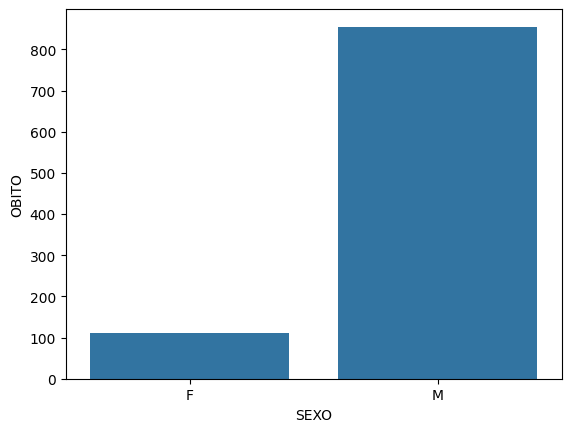

In [45]:
#plotando os dados atraves do seborn
sns.barplot(data=agg_sexo, x="SEXO", y="OBITO");


Observando o gráfico acima podemos ver o maior numero de obitos do sexo masculino

In [ ]:
#sexo_nun = {'F': 0, 'M': 1}
#obitos['SEXO'] = obitos['SEXO'].map(sexo_nun);
#obitos.head()

In [62]:
#agrupamento de obitos por idade (verificar)
agg_idade_min = obitos.groupby('IDADE')['OBITO'].min
#agg_idade_max = obitos.groupby('IDADE')['OBITO'].agg(['max'])
agg_idade_min

<bound method GroupBy.min of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001A891EE1610>>

,min
IDADE,
0,SIM
3,SIM
4,SIM
5,SIM
6,SIM
...,...
86,SIM
87,SIM
88,SIM


In [54]:
obitos['IDADE'].dtype

Int64Dtype()